In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the training data from the csv
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Add in y values

In [3]:
df_y = pd.read_excel('sample_submission.xlsx', usecols=[0,1])
df = pd.merge(df, df_y, on="Id")
df.drop(['Id'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Actual_SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [ ]:
df.describe()

In [ ]:
df.info(memory_usage='deep')

In [ ]:
null_values = df.isnull().sum()
null_values[null_values > 0]

In [ ]:
df.columns

In [ ]:
# Highest correlated features
corr_mat = df.corr()['Actual_SalePrice'].sort_values(ascending=False)
corr_mat[corr_mat > 0.5]

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols, numerical_cols

In [ ]:
# Plot numerical values against Actual SalePrice to visualize correlation
fig = plt.figure(figsize=(10,100))
for i, v in enumerate(numerical_cols):
    ax = fig.add_subplot(40, 2, i+1)
    sns.regplot(x=v, y='Actual_SalePrice', data=df, fit_reg=False, scatter_kws={'alpha': 0.3})
    ax.set_title(v + " x Actual_SalePrice")

fig.tight_layout()
plt.show()




## Preprocessing

### Identify and Remove outliers from saleprice

/opt/homebrew/Caskroom/miniforge/base/envs/ml_test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


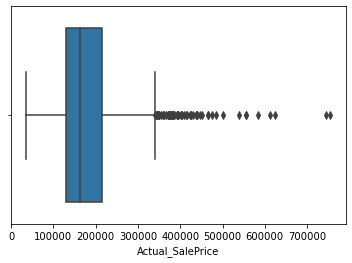

In [6]:
sns.boxplot(df['Actual_SalePrice'], orient='h')
plt.show()

In [7]:
sale_price = df['Actual_SalePrice']
mask = sale_price[abs(sale_price - np.mean(sale_price)) < 1.4 * np.std(sale_price)].tolist()
df_new = df[~df['Actual_SalePrice'].isin(mask) == False]
df_new.shape


(1317, 80)

In [8]:
# Fill Columns where 'NA' isnt NaN

col_na_nan = ['MiscFeature',
          'Fence',
          'PoolQC',
          'GarageCond',
          'GarageQual',
          'GarageFinish',
          'GarageType',
          'FireplaceQu',
          'BsmtFinType1',
          'BsmtFinType2',
          'BsmtExposure',
          'BsmtQual',
          'BsmtCond',
          'Alley']

df_new[col_na_nan] = df_new[col_na_nan].fillna('NA')
print(df_new.shape)
df_new.head()

(1317, 80)


<ipython-input-8-1ae376323685>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col_na_nan] = df_new[col_na_nan].fillna('NA')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Actual_SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Drop Missing Values

In [9]:
# Drop all columns with 250 missing values
MAX_NA_PER_COLUMN = 250

df_new = df_new.dropna(axis=1, thresh=(len(df_new) - MAX_NA_PER_COLUMN))

# Drop all rows with missing values
df_new = df_new.dropna(axis=0, how='any')

# Drop Id column
df_new.shape

(999, 80)

### Split X, y values

In [11]:
df_x = df_new.drop(['Actual_SalePrice'], axis=1)
df_y = df_new['Actual_SalePrice']
df_x.shape, df_y.shape

((999, 79), (999,))

### Feature Scaling

In [12]:
# Normalize all numeric features
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler
numerical_cols = list(df.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Find all columns with numeric types
numList = df_x.select_dtypes(include="number").columns
print(numList)
for feat in numList:
    df_x[feat] = StandardScaler().fit_transform(df_x[[feat]])



df_x.head()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.058685,RL,-0.167489,-0.216443,Pave,NA,Reg,Lvl,AllPub,Inside,...,-0.276769,-0.07051,NA,NA,NA,-0.149667,-1.614592,0.162736,WD,Normal
1,-0.870043,RL,0.460281,0.017525,Pave,NA,Reg,Lvl,AllPub,FR2,...,-0.276769,-0.07051,NA,NA,NA,-0.149667,-0.487424,-0.586449,WD,Normal
2,0.058685,RL,-0.041935,0.353218,Pave,NA,IR1,Lvl,AllPub,Inside,...,-0.276769,-0.07051,NA,NA,NA,-0.149667,1.015466,0.162736,WD,Normal
3,0.290866,RL,-0.376746,0.007352,Pave,NA,IR1,Lvl,AllPub,Corner,...,-0.276769,-0.07051,NA,NA,NA,-0.149667,-1.614592,-1.335635,WD,Abnorml
4,0.058685,RL,0.627687,0.965604,Pave,NA,IR1,Lvl,AllPub,FR2,...,-0.276769,-0.07051,NA,NA,NA,-0.149667,2.142634,0.162736,WD,Normal


### Label Encoding

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_data = df_x.copy(deep=True)
label_encoding_cols = df_x.select_dtypes(include=[object]).columns.tolist()

encoded_data[label_encoding_cols] = ordinal_encoder.fit_transform(encoded_data[label_encoding_cols])

df_x = encoded_data.copy()
df_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.058685,3.0,-0.167489,-0.216443,1.0,1.0,3.0,3.0,0.0,4.0,...,-0.276769,-0.07051,3.0,4.0,0.0,-0.149667,-1.614592,0.162736,8.0,4.0
1,-0.870043,3.0,0.460281,0.017525,1.0,1.0,3.0,3.0,0.0,2.0,...,-0.276769,-0.07051,3.0,4.0,0.0,-0.149667,-0.487424,-0.586449,8.0,4.0
2,0.058685,3.0,-0.041935,0.353218,1.0,1.0,0.0,3.0,0.0,4.0,...,-0.276769,-0.07051,3.0,4.0,0.0,-0.149667,1.015466,0.162736,8.0,4.0
3,0.290866,3.0,-0.376746,0.007352,1.0,1.0,0.0,3.0,0.0,0.0,...,-0.276769,-0.07051,3.0,4.0,0.0,-0.149667,-1.614592,-1.335635,8.0,0.0
4,0.058685,3.0,0.627687,0.965604,1.0,1.0,0.0,3.0,0.0,2.0,...,-0.276769,-0.07051,3.0,4.0,0.0,-0.149667,2.142634,0.162736,8.0,4.0


### Reduce Dimensionality with PCA

In [15]:
from sklearn.decomposition import PCA

PRESERVED_VARIANCE = 0.95 # Float 

pca = PCA(n_components=PRESERVED_VARIANCE)
df_xdim = pca.fit_transform(df_x)
pca.explained_variance_ratio_

array([0.27866006, 0.14432676, 0.07349532, 0.05022409, 0.03691164,
       0.03301457, 0.02164913, 0.02035839, 0.01943214, 0.01762   ,
       0.01675048, 0.01560445, 0.01308145, 0.01210063, 0.01153821,
       0.01145019, 0.01054498, 0.00977047, 0.00953446, 0.0090826 ,
       0.0085554 , 0.00851974, 0.00820554, 0.00795299, 0.00745663,
       0.00722398, 0.00712464, 0.00705288, 0.0066423 , 0.00634148,
       0.00625303, 0.00580459, 0.0056725 , 0.00561491, 0.00532367,
       0.00516526, 0.00490373, 0.00447989, 0.00428815, 0.00412633,
       0.00384106, 0.00371622, 0.00346967])

### Train / Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Split into random train/test sets

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.10, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((899, 79), (100, 79), (899,), (100,))

# Individual Models

### Linear Regression

In [23]:
# Train the Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error

# Helper RMSE function
def rmse(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    return np.sqrt(mse)

In [25]:
# Compute RMSE of linear regression model
rmse(lin_reg, X_test, y_test)

46927.02153820815

### Gaussian Process

### Random Forest

### XGBoost

In [26]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)
Y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print("RMSE: ",round(mean_squared_error((y_test),(Y_pred), squared=False), 4))

/opt/homebrew/Caskroom/miniforge/base/envs/ml_test/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.883509743161401
RMSE:  15885.1054


# Ensemble Model

In [27]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, RBF

np.random.seed(seed=0)
# random_state = 0

kernel = DotProduct() + RBF()
gauss = GaussianProcessRegressor(kernel=kernel, random_state=1)


lr_ens = LinearRegression()
xg_ens = xgb.XGBRegressor()
rf_ens = RandomForestRegressor(random_state=1)
ereg = VotingRegressor(estimators=[('rf', rf_ens), ('xg', xg_ens), ('lr', lr_ens), ('ga', gauss)])
ereg.fit(X_train, y_train)
ens_preds = ereg.predict(X_test)
print(ereg.score(X_test, y_test))
print("RMSE: ",round(mean_squared_error((y_test),(ens_preds), squared=False), 4))

/opt/homebrew/Caskroom/miniforge/base/envs/ml_test/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.6510906341492162
RMSE:  27491.7011


/opt/homebrew/Caskroom/miniforge/base/envs/ml_test/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_test/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_test/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt